# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [29]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [4]:
df=spaceship

In [5]:
df.shape

(8693, 14)

**Check for data types**

In [6]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [10]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
df.shape

(6606, 14)

In [12]:
df['Cabin'].value_counts()

Cabin
C/137/S     7
G/1476/S    7
G/734/S     7
B/11/S      7
E/13/S      7
           ..
G/129/P     1
A/98/P      1
G/1499/S    1
G/1500/S    1
F/3/S       1
Name: count, Length: 5305, dtype: int64

In [13]:
df['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      shape=(5305,), dtype=object)

In [14]:
# Map the Cabin column to categories A, B, C, D, E, F, G, T
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'].value_counts()

Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

- Drop PassengerId and Name

In [15]:
#eliminar columnas PassengerId, Name
df.drop(columns=['PassengerId','Name'],inplace=True)


- For non-numerical columns, do dummies.

In [16]:
df.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [17]:
#eliminar espacios en blanco en el nombre de la columna Destination
df['Destination']=df['Destination'].str.strip()
df=pd.get_dummies(df,columns=['Destination'],drop_first=True)



In [18]:
df=pd.get_dummies(df,columns=['CryoSleep'],drop_first=True)

In [19]:
df=pd.get_dummies(df,columns=['VIP'],drop_first=True)

In [20]:
#hacer dummies de la columna HomePlanet
df=pd.get_dummies(df,columns=['HomePlanet'],drop_first=True)

In [21]:
df=pd.get_dummies(df,columns=['Cabin'],drop_first=True)

**Perform Train Test Split**

In [22]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,HomePlanet_Europa,HomePlanet_Mars,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,True,False,True,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,True,False,False,False,False,False,False,False,False,True,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,True,True,False,False,False,False,False,False,False,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,True,False,False,False,False,False,False,False,False,True,False,False


**Model Selection**

In [23]:
df.dtypes

Age                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                     bool
Destination_PSO J318.5-22       bool
Destination_TRAPPIST-1e         bool
CryoSleep_True                  bool
VIP_True                        bool
HomePlanet_Europa               bool
HomePlanet_Mars                 bool
Cabin_B                         bool
Cabin_C                         bool
Cabin_D                         bool
Cabin_E                         bool
Cabin_F                         bool
Cabin_G                         bool
Cabin_T                         bool
dtype: object

In [24]:
df['CryoSleep_True']=df['CryoSleep_True'].astype('int')
df['VIP_True']=df['VIP_True'].astype('int')
df['HomePlanet_Europa']=df['HomePlanet_Europa'].astype('int')
df['HomePlanet_Mars']=df['HomePlanet_Mars'].astype('int')
df['Destination_PSO J318.5-22']=df['Destination_PSO J318.5-22'].astype('int')
df['Destination_TRAPPIST-1e']=df['Destination_TRAPPIST-1e'].astype('int')
df['Transported']=df['Transported'].astype('int')

In [25]:
# Convertir todas las columnas de Cabin a valores numéricos
cabin_columns = ['Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T']
df[cabin_columns] = df[cabin_columns].astype(int)

In [26]:
df.dtypes


Age                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
CryoSleep_True                 int64
VIP_True                       int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Cabin_B                        int64
Cabin_C                        int64
Cabin_D                        int64
Cabin_E                        int64
Cabin_F                        int64
Cabin_G                        int64
Cabin_T                        int64
dtype: object

In this exercise we will be using **KNN** as our predictive model.

In [32]:
#usamos knn para predecir la columna Transported


X = df.drop(columns=['Transported'])
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)   

KNeighborsClassifier(n_neighbors=3)

- Evaluate your model's performance. Comment it

In [35]:
# Predecir la columna Transported
y_pred = KNN.predict(X_test)
accuracy_score(y_test, y_pred)


0.7685325264750378

In [36]:
#la performance es de 0.76

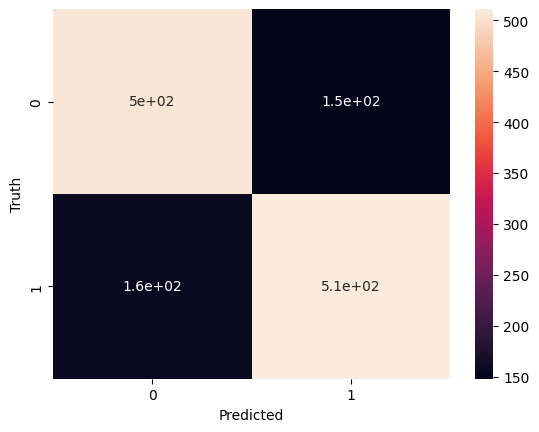

In [37]:
#ver matriz de confusion grafico
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [38]:
#calculate the recall 

from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7638266068759342

In [39]:
#calculate the precision
from sklearn.metrics import precision_score


precision_score(y_test, y_pred)

0.7754172989377845

In [40]:

#calculate the f1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)


0.7695783132530121

In [41]:
#clasification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.77      0.77       653
           1       0.78      0.76      0.77       669

    accuracy                           0.77      1322
   macro avg       0.77      0.77      0.77      1322
weighted avg       0.77      0.77      0.77      1322

